## The 6th Project for Data Analyst Nano Degree (Communicating Data Findings)

#### My dataset for this project is From Kaggla  (https://www.kaggle.com/datasnaek/youtube-new)
#### This dataset meets the requirements as illustrated bellow

#### Context
YouTube (the world-famous video sharing website) maintains a list of the top trending videos on the platform. According to Variety magazine, “To determine the year’s top-trending videos, YouTube uses a combination of factors including measuring users interactions (number of views, shares, comments and likes). Note that they’re not the most-viewed videos overall for the calendar year”. Top performers on the YouTube trending list are music videos (such as the famously virile “Gangam Style”), celebrity and/or reality TV performances, and the random dude-with-a-camera viral videos that YouTube is well-known for.

## Dataset columns 
- video_id (object)
- trending_date (object)
- title (object)
- channel_title (object)
- category_id (int64)
- publish_time (object) (needs to be modified to timestamp)
- tags (int64)
- views (int64)
- likes (int64)
- dislikes (int64)
- comment_count (int64)
- thumbnail_link (object)
- comments_disabled (bool)
- ratings_disabled (bool)
- video_error_or_removed (bool)
- description (object)

Data requirements check:
- Include at least 600 observations (OK.)
- Include at least eight variables (OK.)
- Include at least one qualitative / categorical variable. (This can also be engineered / created.) (OK.)
- Include at least one numeric variable. (OK.)
- Tidiness (OK.)

In [3]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [4]:
df = pd.read_csv('USvideos2.csv')

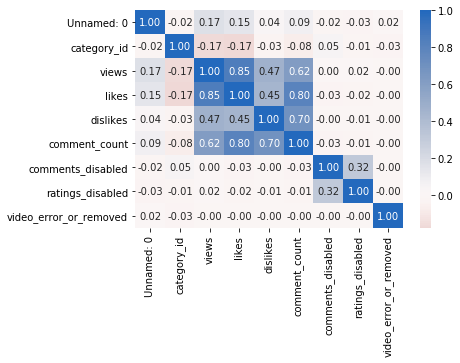

In [4]:
33sb.heatmap(df.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0)

In [10]:
df.corr(method='pearson')

,Unnamed: 0,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,likes_log,views_log,dislikes_log,comment_log
Unnamed: 0,1.000000,-0.020884,0.174760,0.150828,0.038505,0.086310,-0.015650,-0.030474,0.016681,0.373601,0.440277,0.369480,0.322675
category_id,-0.020884,1.000000,-0.168231,-0.173921,-0.033547,-0.076307,0.048949,-0.013506,-0.030011,-0.144521,-0.172070,-0.105567,-0.107575
views,0.174760,-0.168231,1.000000,0.849177,0.472213,0.617621,0.002677,0.015355,-0.002256,0.387948,0.494099,0.431819,0.362787
likes,0.150828,-0.173921,0.849177,1.000000,0.447186,0.803057,-0.028918,-0.020888,-0.002641,0.456682,0.466928,0.438127,0.434318
dislikes,0.038505,-0.033547,0.472213,0.447186,1.000000,0.700184,-0.004431,-0.008230,-0.001853,0.176128,0.206148,0.263181,0.199166
comment_count,0.086310,-0.076307,0.617621,0.803057,0.700184,1.000000,-0.028277,-0.013819,-0.003725,0.313172,0.319630,0.338751,0.357253
comments_disabled,-0.015650,0.048949,0.002677,-0.028918,-0.004431,-0.028277,1.000000,0.319230,-0.002970,-0.152176,-0.021518,-0.071231,-0.450011
ratings_disabled,-0.030474,-0.013506,0.015355,-0.020888,-0.008230,-0.013819,0.319230,1.000000,-0.001526,-0.292085,-0.021254,-0.214666,-0.165460
video_error_or_removed,0.016681,-0.030011,-0.002256,-0.002641,-0.001853,-0.003725,-0.002970,-0.001526,1.000000,-0.001422,-0.002007,-0.000226,-0.013419
likes_log,0.373601,-0.144521,0.387948,0.456682,0.176128,0.313172,-0.152176,-0.292085,-0.001422,1.000000,0.854097,0.832225,0.839598


### Positive correlation:
- Strong correlation between the number of views and the increase of likes for each videos.
- Strong correlation between the number of views and the increase of dislike for each videos
- Strong positive correlation between the number of comments and views
- strong positive correlation between likes and comment_count

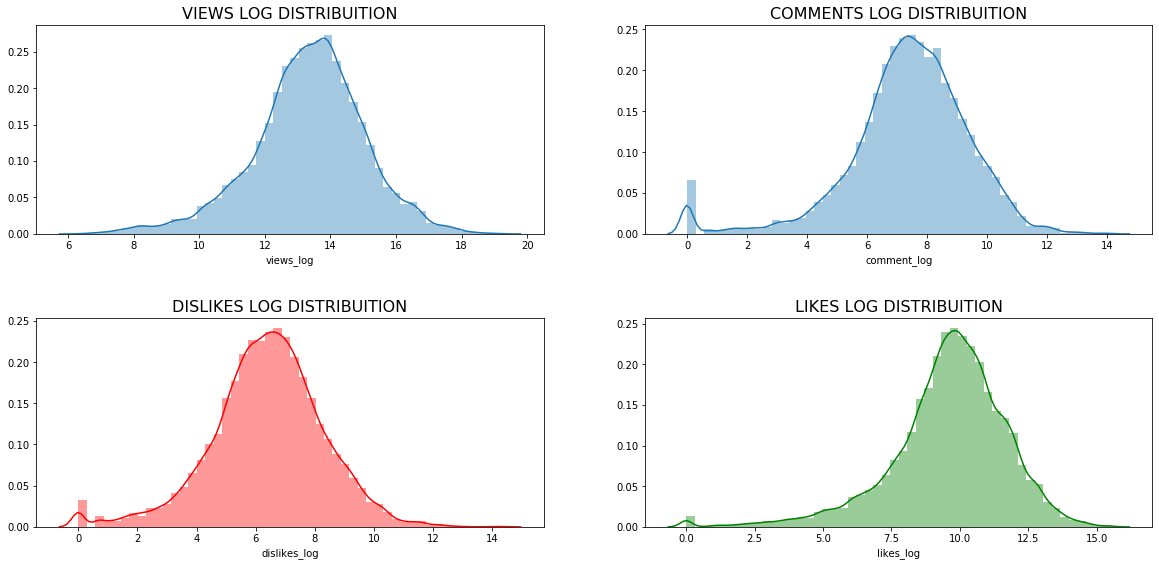

In [8]:
df['likes_log'] = np.log(df['likes'] + 1)
df['views_log'] = np.log(df['views'] + 1)
df['dislikes_log'] = np.log(df['dislikes'] + 1)
df['comment_log'] = np.log(df['comment_count'] + 1)
plt.figure(figsize = (20,9))

plt.subplot(2,2,1)
g1 = sb.distplot(df['views_log'])
g1.set_title("VIEWS LOG DISTRIBUITION", fontsize=16)

plt.subplot(2,2,4)
g2 = sb.distplot(df['likes_log'],color='green')
g2.set_title('LIKES LOG DISTRIBUITION', fontsize=16)

plt.subplot(2,2,3)
g3 = sb.distplot(df['dislikes_log'], color='r')
g3.set_title("DISLIKES LOG DISTRIBUITION", fontsize=16)

plt.subplot(2,2,2)
g4 = sb.distplot(df['comment_log'])
g4.set_title("COMMENTS LOG DISTRIBUITION", fontsize=16)


plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)

plt.show()

#### Likes & Views & Comment_count & Dislkes are normally distrubted 

-------------------------------------------------------
## Exploring The most frequent category 

Text(0, 0.5, 'Count')

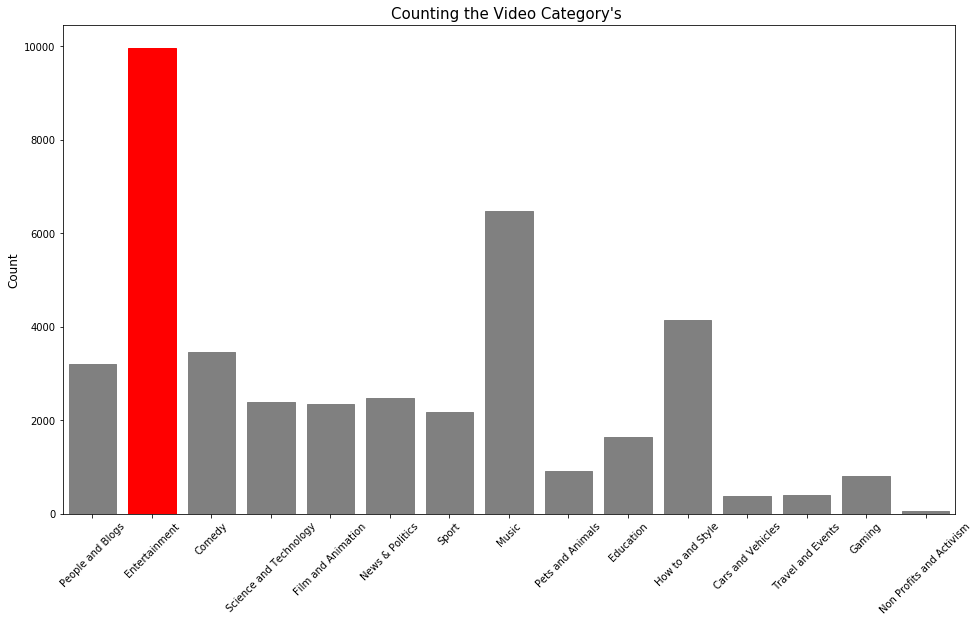

In [5]:
plt.figure(figsize = (16,9))
ax = sb.countplot(x="category_name", data=df,  orient ='H')
for bar in ax.patches:
    if bar.get_height() > 8000:
        bar.set_color('red')    
    else:
        bar.set_color('grey')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title("Counting the Video Category's ", fontsize=15)
ax.set_xlabel('', fontsize=12)
ax.set_ylabel("Count", fontsize=12)

## Best 12 Channels view comparison 

In [7]:
Best_twl = df[['channel_title', 'views']]
Best_twl = Best_twl.groupby('channel_title')['views'].sum()
Best_twl = pd.DataFrame(Best_twl)
Best_twl = Best_twl.sort_values('views', ascending=False)
Best_twl = Best_twl[:12]
Best_twl= Best_twl.reset_index()
Best_twl.head()

,channel_title,views
0,ChildishGambinoVEVO,3758488765
1,ibighit,2235906679
2,Dude Perfect,1870085178
3,Marvel Entertainment,1808998971
4,ArianaGrandeVevo,1576959172


Text(0, 0.5, 'Views Counts')

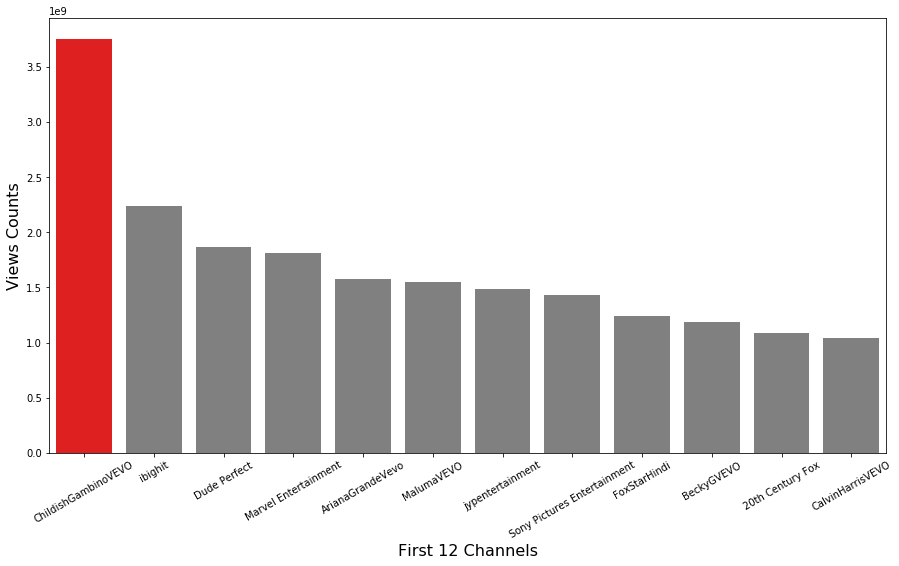

In [8]:
plt.figure(figsize=(15, 8))
c = ['red', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey']
ax = sb.barplot(data = Best_twl, x = 'channel_title', y ='views', palette =c)
ax.set_xticklabels(labels= Best_twl.channel_title, fontsize=10, rotation=30)
ax.set_xlabel(xlabel='First 12 Channels', fontsize=16)
ax.set_ylabel(ylabel='Views Counts', fontsize=16)

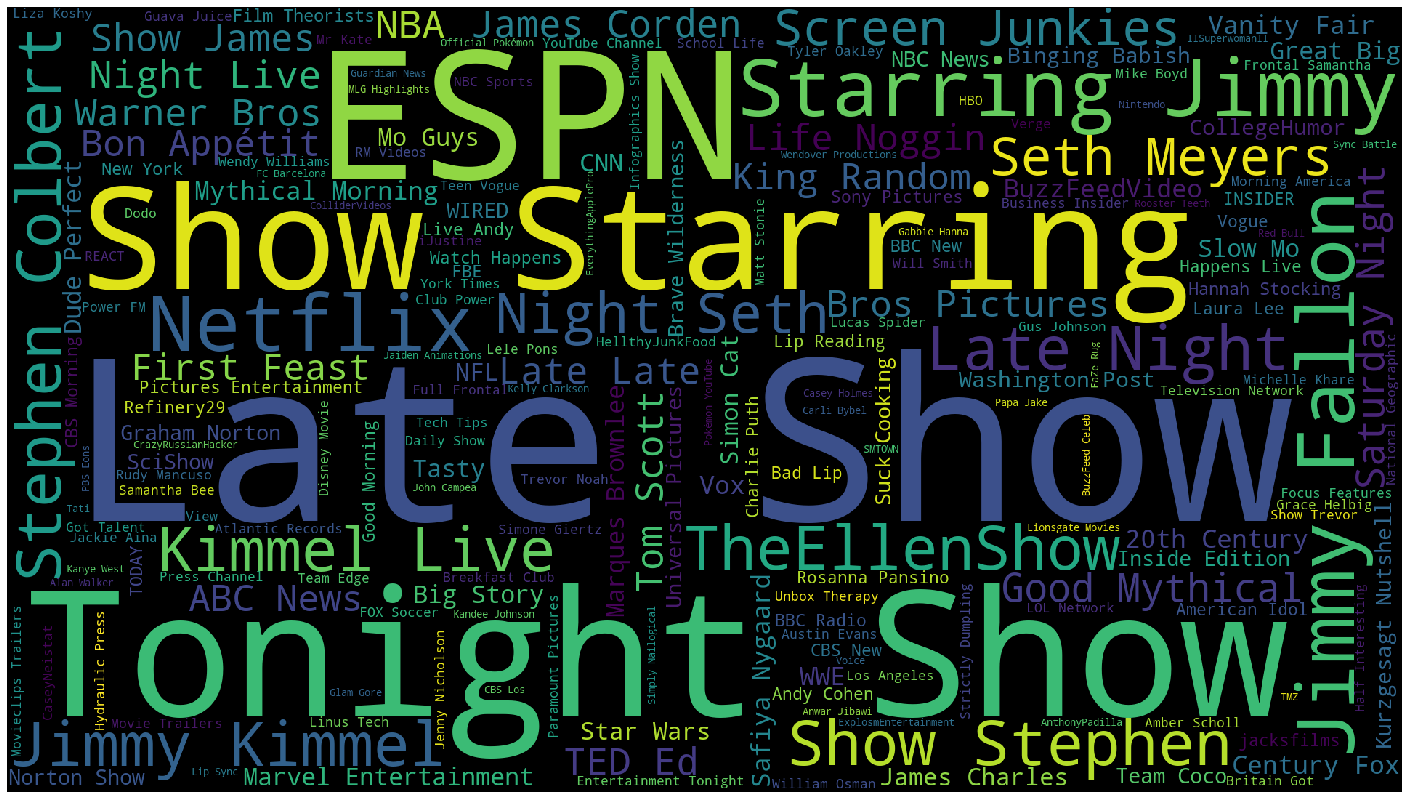

In [5]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.channel_title))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('category.png')
plt.show()

## Summary of Findings
- Strong correlation between the number of views and the increase of likes for each videos.

- Most of the likes ranges from 0 to 1 million the numbers reduses dramatically after 3 million

- Most of dislikes are between 0 to 250000 decresing radically after that

- Strong correlation between the number of views and the increase of dislike for each videos

- Strong positive correlation between the number of comments and views

- strong positive correlation between likes and comment_count

- According to dataset the highest two years for veiws and likes are 2017, 2018.

- The most common words for channels names in US are

- Late show -ESPN -Show Starting -Netflix -Stephen Colbert -Starring Jimmy

- The Highest channel in veiws is (ChildishGambinoVEVO)